In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import tensorflow as tf
from tensorflow import keras

#file tools
import os
import pickle

#Use jupyter's backend to render plots
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
#import matplotlib.lines as mlines
#import seaborn as sns; sns.set(color_codes=True)
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import mean_squared_error

#for audio recording
import wave  
#!pip install pyaudio
#import pyaudio
import sys
import librosa
import librosa.display
import IPython.display as ipd  # To play sound in the notebook

import warnings;
warnings.filterwarnings("ignore") #clear warnings

In [13]:
# path_notebooks = '/content/notebooks/'
#os.listdir('/content/notebooks/') #lists directory
#MODEL_DIR_PATH = path_notebooks + "models/" #path to models
#EXAMPLES_PATH = path_notebooks + "audio/" #path to audio files
#os.listdir(EXAMPLES_PATH) #lists directory
from config import EXAMPLES_PATH
from config import MODEL_DIR_PATH
os.listdir(EXAMPLES_PATH) #lists directory

['examples_03-01-01-01-01-02-05.wav',
 'angry_file.wav',
 'examples_10-16-07-29-82-30-63.wav']

In [ ]:
"""
from google.colab import drive
drive.mount('/content/drive')
"""
!pwd

/content/hackcu2021/notebooks


In [ ]:
"""
# IMPOTRTANT: set the path where the data files are relative to the Notebook file. 
# You can change the variable pathname below to anything that suits you, For example,
# if your Notebook file is to be run on Google Colab, then you will need to set up
# this variable properly, e.g., 
#pathname = os.path.join('My Drive', 'sofwerx').

#For Google Colab

from google.colab import drive
drive.mount('/content/gdrive') #already mounted, but need to remount if changing runtime
#print(os.listdir('.'))
pathname = 'gdrive/My Drive/sofwerx/'
os.listdir('gdrive/My Drive/sofwerx/') #lists directory


#for root folder
#pathname = '.'
"""

"\n# IMPOTRTANT: set the path where the data files are relative to the Notebook file. \n# You can change the variable pathname below to anything that suits you, For example,\n# if your Notebook file is to be run on Google Colab, then you will need to set up\n# this variable properly, e.g., \n#pathname = os.path.join('My Drive', 'hackcu').\n\n#For Google Colab\n\nfrom google.colab import drive\ndrive.mount('/content/gdrive') #already mounted, but need to remount if changing runtime\n#print(os.listdir('.'))\npathname = 'gdrive/My Drive/hackcu/'\nos.listdir('gdrive/My Drive/hackcu/') #lists directory\n\n\n#for root folder\n#pathname = '.'\n"

In [14]:

# Recreate the exact same model, including its weights and the optimizer
emotion_model = tf.keras.models.load_model("Emotion_Voice_Detection_Modelv6.h5")
# Show the model architecture
emotion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 40, 64)            384       
_________________________________________________________________
activation_1 (Activation)    (None, 40, 64)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 20488     
_________________________________________________________________
activation_2 (Activation)    (None, 8)                 0         
Total params: 20,872
Trainable params: 20,872
Non-trainable params: 0
__________________________________________________

In [15]:
#load 4s sound file and playback
data, sampling_rate = librosa.load('slice0.wav')
ipd.Audio('slice0.wav')

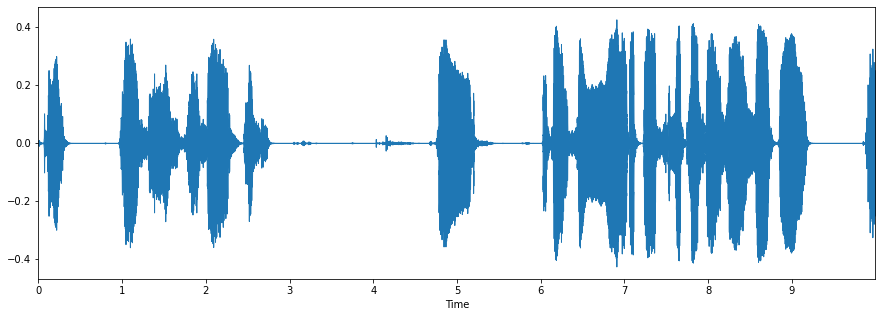

In [16]:
#visualise
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
#!python live_predictions.py

In [ ]:
import keras
import librosa
import numpy as np

# from config import EXAMPLES_PATH
# from config import MODEL_DIR_PATH

class LivePredictions:
    """
    Main class of the application.
    """

    def __init__(self, file):
        """
        Init method is used to initialize the main parameters.
        """
        self.file = file
        self.path = 'Emotion_Voice_Detection_Modelv6.h5'
        self.loaded_model = keras.models.load_model(self.path)

    def make_predictions(self):
        """
        Method to process the files and create your features.
        """
        data, sampling_rate = librosa.load(self.file)
        mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40).T, axis=0)
        x = np.expand_dims(mfccs, axis=1)
        #x = np.expand_dims(mfccs, axis=2) #original code
        x = np.expand_dims(x, axis=0)
        predictions = self.loaded_model.predict_classes(x)
        result = self.convert_class_to_emotion(predictions)
        print( "Prediction is", " ", result)
        return result

    @staticmethod
    def convert_class_to_emotion(pred):
        """
        Method to convert the predictions (int) into human readable strings.
        """
        
        label_conversion = {'0': 'neutral',
                            '1': 'calm',
                            '2': 'happy',
                            '3': 'sad',
                            '4': 'angry',
                            '5': 'fearful',
                            '6': 'disgust',
                            '7': 'surprised'}

        for key, value in label_conversion.items():
            if int(key) == pred:
                label = value
        return label


if __name__ == '__main__':
    live_prediction = LivePredictions(file='slice0.wav')
    #live_prediction.loaded_model.summary()
    live_prediction.make_predictions()

Prediction is   angry


In [ ]:
#to make new predictions, first 
# 1. provide path
live_prediction = LivePredictions(file='slice1.wav') #meant to be calm
#live_prediction.loaded_model.summary()
# 2. use make_predictions() function, returns result
prediction_1 = live_prediction.make_predictions()
live_prediction = LivePredictions(file='slice2.wav') #meant to be calm
prediction_2 = live_prediction.make_predictions()


Prediction is   sad
Prediction is   sad


In [ ]:
print(prediction_1)

sad
